### This code calculates the "complexity" of a path based on its box dimension
### written by Tanvi Deora, based on original version by Mahad Ahmed
### 2020, Sept 15

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import cv2
import math

# load in the data with filtered pixels

In [2]:
data = pd.read_csv('./dataFolders/Output/KinematicAnalysis_Final/LowPassFilteredCentroidInPixelsSpace.csv')

In [3]:
data.head()

,Unnamed: 0,name,visit,flower_r,flower_x,flower_y,x,y,x_pixel,y_pixel,x_filtered,y_filtered
0,0,L0.1_c-3_m10,last,74,310,233,NaN,NaN,NaN,NaN,NaN,NaN
1,1,L0.1_c-3_m10,last,74,310,233,NaN,NaN,NaN,NaN,NaN,NaN
2,2,L0.1_c-3_m10,last,74,310,233,NaN,NaN,NaN,NaN,NaN,NaN
3,3,L0.1_c-3_m10,last,74,310,233,0.810811,2.297297,24.0,68.0,23.997467,67.98341
4,4,L0.1_c-3_m10,last,74,310,233,1.013514,2.770270,30.0,82.0,24.708767,143.71776


In [4]:
# remove the problematic moths - 

prob_cases = pd.read_csv(r"G:/My Drive/Mahad/Light Level Experiments/Data Output from Analysis/" \
                         r"VideosWithMarkers/FirstLastTroubleVideos_v4/names.csv")

prob_cases['name'] = prob_cases['name'].str[1:-9]
prob_cases.head()

,Unnamed: 0,name
0,0,L0.1_c-3_m10_first
1,1,L0.1_c-3_m10_last
2,2,L0.1_c-3_m12_first
3,3,L0.1_c-3_m12_last
4,4,L0.1_c-3_m23_last


In [5]:
data['fullname'] = data['name'] + '_' + data['visit']

In [6]:
subset = data[~data['fullname'].isin(prob_cases.name)]

In [7]:
len(subset.fullname.unique())

75

## determine the size of track that will be printed

In [8]:
length = []
n = []
v = []
for name, df in subset.groupby('name'):
    for visit, sub_df in df.groupby('visit'):
        l = len(sub_df)
        length.extend([l])
        n.extend([name])
        v.extend([visit])

length_df = pd.DataFrame({'name': n,
             'visit': v,
             'length': length})
    
ShortestVideo = min(length)
medianLength = np.nanmedian(length)

# divide the sortest chunk into 4 bits and that number will be the # of frames each track will be divided into 
# for box dimesnuon analysis

lengthOfEachChunk = ShortestVideo/4
print('Shortest length is %d and median length is %d' %(ShortestVideo, medianLength))

Shortest length is 24 and median length is 722


In [9]:
length_df.head()

,name,visit,length
0,L0.1_c-3_m2,first,1224
1,L0.1_c-3_m2,last,199
2,L0.1_c-3_m20,first,282
3,L0.1_c-3_m20,last,71
4,L0.1_c-3_m21,first,180


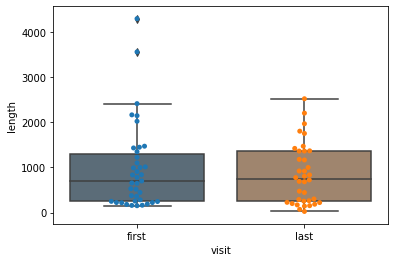

In [10]:
import seaborn as sns
sns.boxplot(x = 'visit' , y = 'length', data = length_df
           , saturation = 0.2)
sns.swarmplot(x = 'visit' , y = 'length', data = length_df)
# x = np.random.normal(1, 0.04, size=len(y))
# plt.boxplot(y)
# plt.plot(x, y, 'r.', alpha=0.2)

In [11]:
n= []
for name, df in subset.groupby('fullname'):
    l = len(df)
    if l < 120:
        print(l)
        n.append(name)
print(n)        

71
24
['L0.1_c-3_m20_last', 'L0.1_c-3_m46_last']


In [ ]:
# set the length of chuck and do the rest of analysis

In [ ]:
# alternatively each chunck can be 40 frames == @100fps and @25Hz WBF is about 10 wingbeats
# lengthOfEachChunk = 40
# lengthOfEachChunk = ShortestVideo
# lengthOfEachChunk = 40*3

# print out the tracks

In [12]:
# plot the tracks

def PlotTracks(x, y, ax):
    ax.plot(x,y, c= "k")
    ax.set_xlim(0, 648)
    ax.set_ylim(0, 488)
    ax.grid(False)
    ax.axis('off')

In [16]:
# make file folder to keep all track image

# mystr = r"G:/My Drive/Mahad/Light Level Experiments/Data Output from Analysis/" \
#                       r"motionAnalysis_Final/FractalDimension/Tracks/" 
# filefolder = mystr + str(lengthOfEachChunk) + 'Frames/'

mystr = './dataFolders/Output/KinematicAnalysis_Final/'
filefolder = 'wholeTracks'
try:  
    os.mkdir(mystr + filefolder)  
except OSError as error:  
    print(error) 

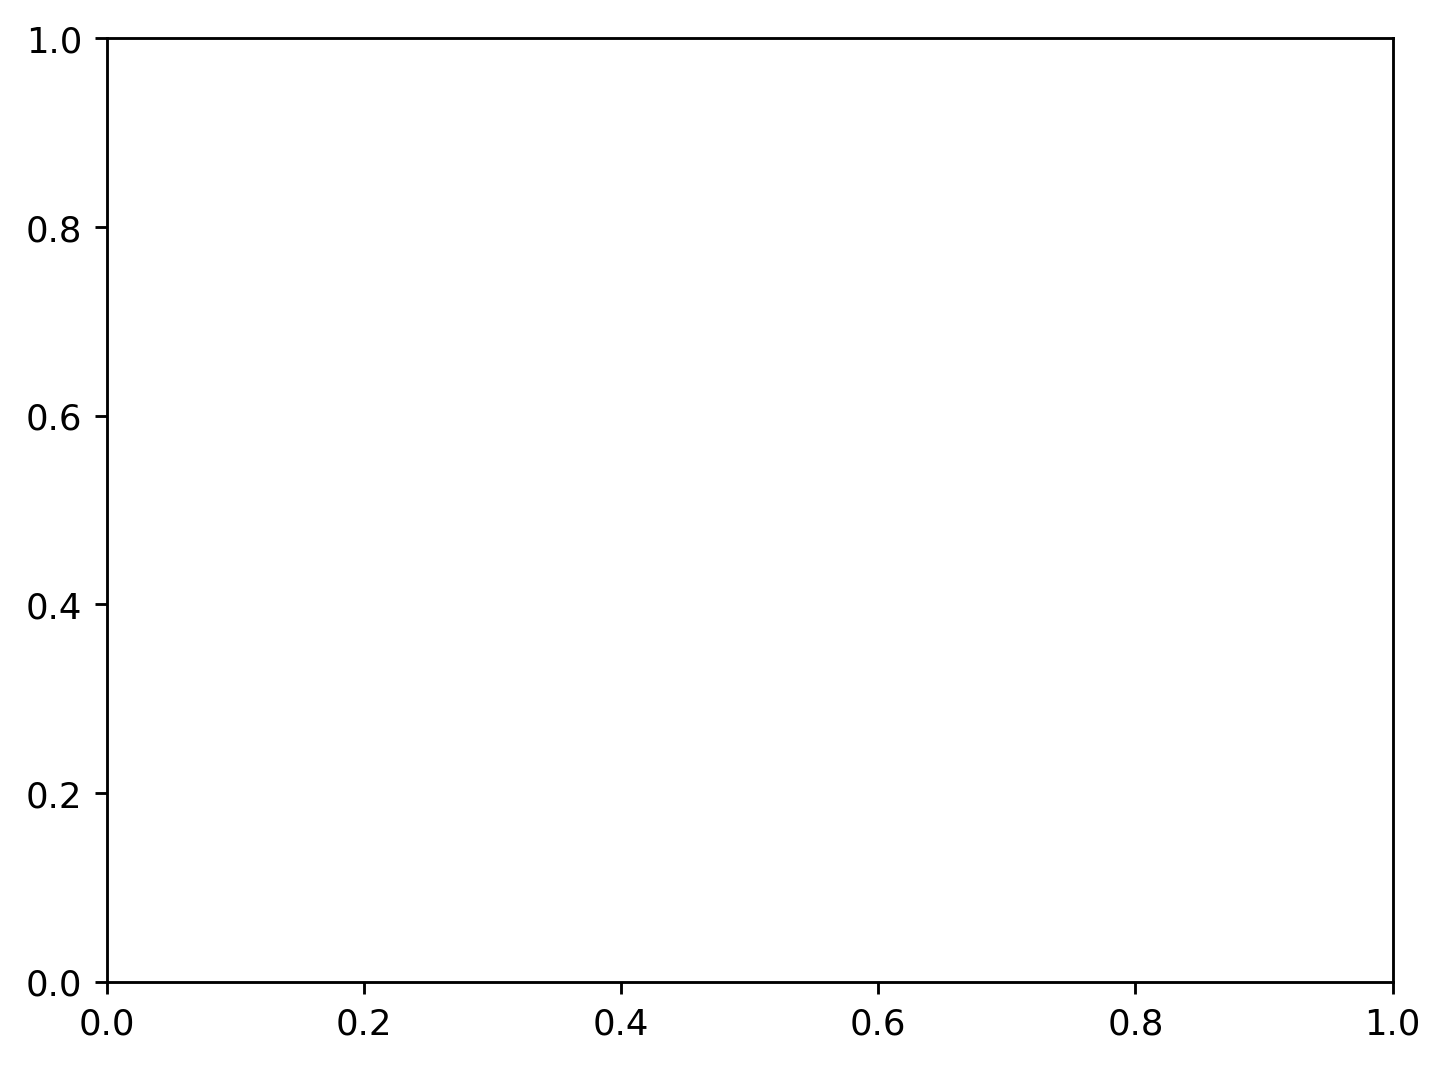

In [17]:
f, ax = plt.subplots(figsize = (648*1/100,488*1/100),  dpi= 256)
  
for name, df in subset.groupby('fullname'):
    x = df.x_filtered
    y = df.y_filtered
    
    PlotTracks(x,y, ax)
    f.savefig(mystr + filefolder + '/' + name + '.png')
    ax.cla()
    
#     chunks = len(x)/lengthOfEachChunk
    
#     for ii in np.arange(math.ceil(chunks)):
#         ii = int(ii)
#         if lengthOfEachChunk*ii + lengthOfEachChunk > len(x):
#             x_section = x[-lengthOfEachChunk:]
#             y_Section = y[-lengthOfEachChunk:]
# #             continue
#         else:
#             x_section = x[lengthOfEachChunk*ii : lengthOfEachChunk*ii + lengthOfEachChunk]
#             y_section = y[lengthOfEachChunk*ii : lengthOfEachChunk*ii + lengthOfEachChunk]
            
#             PlotTracks(x_section, y_section, ax)
#             figname = name+'_chunk'+str(ii)
#             f.savefig(filefolder  + figname + '.png')
#             ax.cla()

# read in the track chunks and do the box dimension analysis

In [18]:
# lengthOfEachChunk = ShortestVideo
# lengthOfEachChunk = 40*3
# lengthOfEachChunk = 40
# filefolder = mystr + str(lengthOfEachChunk) + 'Frames/'
direc = mystr + filefolder + '/'

In [19]:
from numpy.polynomial.polynomial import polyfit

def boxDimension(x,y):
    highest_power = 7 
    scale = np.logspace(2, highest_power, num = highest_power-1, base = 2)
    number_filled = []
    dimension_list = []

    for b in scale:
        bins = b
        heatmap, xedges, yedges = np.histogram2d(-y, x, bins=int(bins))
        box_num = heatmap[heatmap > 0]
        number_filled.append(float(len(box_num)))

    number_filled = np.asarray(number_filled)
    b, m = polyfit((np.log(scale)/np.log(2)), (np.log(number_filled)/np.log(2)), 1) 
    dimension_list.append(m)
    dimension = np.mean(dimension_list)
    
    return(dimension)

In [20]:
def convertImage2BoxDim(im):
    im = (im < 255) * 100
    image = cv2.cvtColor(im.astype("uint8"), cv2.COLOR_BGR2GRAY)
    x = np.where(image > 0)[1]
    y = np.where(image > 0)[0]

    d = boxDimension(x,y)
    return(d)

In [ ]:
# analyze box dimension for chunked data

# files = glob.glob(filefolder + '*chunk*.png')
# if not files:
#     print('No files were read')
# else:
#     print('%d files were read' %len(files))

In [21]:
# analyze box dimension for the entire tracks

files = glob.glob(direc + '*L*.png')
if not files:
    print('No files were read')
else:
    print('%d files were read' %len(files))

75 files were read


In [22]:
name = []
chunk = []
dimension = []

for i,f in enumerate(files): 
#     a,b,c,d, e = os.path.basename(f).split('_')
    a,b,c,d = os.path.basename(f).split('_')
    n = a + '_' + b + '_' + c + '_' + d[:-4]
#     part = e[:-4]
    part = 'whole'
    
    im = cv2.imread(f)
    
    dim = convertImage2BoxDim(im)
    
    name.append(n)
    chunk.append(part)
    dimension.append(dim)

In [23]:
df = pd.DataFrame({'name' : name,
             'chunk' : chunk,
             'dimension' : dimension})
df.head()

,name,chunk,dimension
0,L0.1_c-3_m20_first,whole,1.389545
1,L0.1_c-3_m20_last,whole,1.413764
2,L0.1_c-3_m21_first,whole,1.496805
3,L0.1_c-3_m21_last,whole,1.411501
4,L0.1_c-3_m22_first,whole,1.472615


In [24]:
# remove the problematic moths - 

prob_cases = pd.read_csv(r"G:/My Drive/Mahad/Light Level Experiments/Data Output from Analysis/" \
                         r"VideosWithMarkers/FirstLastTroubleVideos_v4/names.csv")

prob_cases['name'] = prob_cases['name'].str[1:-9]
prob_cases.head()

,Unnamed: 0,name
0,0,L0.1_c-3_m10_first
1,1,L0.1_c-3_m10_last
2,2,L0.1_c-3_m12_first
3,3,L0.1_c-3_m12_last
4,4,L0.1_c-3_m23_last


In [27]:
len(df.name.unique())

75

In [28]:
df = df[~df['name'].isin(prob_cases.name)]

In [29]:
len(df.name.unique())

75

In [30]:
name = []
dimension = []
for n, sub in df.groupby('name'):
        mean_d = sub.dimension.mean()
        name.append(n)
        dimension.append(mean_d)  
final_dim = pd.DataFrame({'name' : name,
                         'dimension' : dimension})       

In [31]:
final_dim[['lightLevel', 'mothID']] = final_dim.name.str.split('_', n = 1, expand = True)
final_dim[['flower', 'mothID', 'visit']] = final_dim.mothID.str.split('_', n= 2, expand = True)
final_dim.to_csv(mystr + 'dimension_df_ChunkSize' + str(lengthOfEachChunk) + '.csv')
final_dim.head()

,name,dimension,lightLevel,mothID,flower,visit
0,L0.1_c-3_m20_first,1.389545,L0.1,m20,c-3,first
1,L0.1_c-3_m20_last,1.413764,L0.1,m20,c-3,last
2,L0.1_c-3_m21_first,1.496805,L0.1,m21,c-3,first
3,L0.1_c-3_m21_last,1.411501,L0.1,m21,c-3,last
4,L0.1_c-3_m22_first,1.472615,L0.1,m22,c-3,first


In [36]:
final_dim.to_csv('./dataFolders/Output/KinematicAnalysis_Final/BoxDimension.csv')

In [33]:
from scipy import stats
low_first = final_dim.loc[(final_dim.lightLevel == 'L0.1') & (final_dim.visit == 'first')
                          , 'dimension'].values
high_first = final_dim.loc[(final_dim.lightLevel == 'L0.1') & (final_dim.visit == 'first')
                           , 'dimension'].values
low_last = final_dim.loc[(final_dim.lightLevel == 'L0.1') & (final_dim.visit == 'last')
                          , 'dimension'].values
high_last = final_dim.loc[(final_dim.lightLevel == 'L50') & (final_dim.visit == 'last')
                          , 'dimension'].values

s_first, p_first = stats.mannwhitneyu(low_first, high_first)
print('first visit')
print('mann Whitney U test: statistic %5f and p value %5f' %(s_first, p_first))
print(stats.ks_2samp(low_first, high_first))

s_last, p_last = stats.mannwhitneyu(low_last, high_last)
print('last visit')
print('mann Whitney U test: statistic %5f and p value %5f' %(s_last, p_last))
print(stats.ks_2samp(low_last, high_last))

p = [p_first, p_last]

first visit
mann Whitney U test: statistic 220.500000 and p value 0.494978
Ks_2sampResult(statistic=0.0, pvalue=1.0)
last visit
mann Whitney U test: statistic 128.000000 and p value 0.144597
Ks_2sampResult(statistic=0.2777777777777778, pvalue=0.5025900605581054)


In [5]:
for v, test_df in final_dim.groupby('visit'):
    for t, final in test_df.groupby('lightLevel'):
        l = len(final.mothID.unique())
        print('Num of moths for %s and %s is %i' %(v, t, l))

Num of moths for first and L0.1 is 21
Num of moths for first and L50 is 18
Num of moths for last and L0.1 is 18
Num of moths for last and L50 is 18


## MAKE THE PLOTS

In [2]:
#define the colors for low and high light levels
mc = {'L0.1': 'black', 'L50':'grey' }
c = {'L0.1': 'mediumpurple', 'L50':'darkorange'}
# boxprops = {'edgecolor': 'k', 'linewidth': 2,'alpha': 1}
boxprops = {'edgecolor': 'k', 'linewidth': 0.75,'alpha': 1}
lineprops = {'color': 'k', 'linewidth': 0.75}
capprops = {'linewidth': 0}

bkwargs = {'palette': c, 'order': ['L0.1', 'L50']}
skwargs =  {'palette': mc, 'order': ['L0.1', 'L50']}
boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                       'whiskerprops': lineprops, 'capprops': capprops,
                       'width': 0.4},
                      **bkwargs)
stripplot_kwargs = dict({'linewidth': 0.6, 'size': 6, 'alpha': 0.8},
                        **skwargs)

In [2]:
final_dim = pd.read_csv('./dataFolders/Output/KinematicAnalysis_Final/BoxDimension.csv')

In [8]:
import seaborn as sns

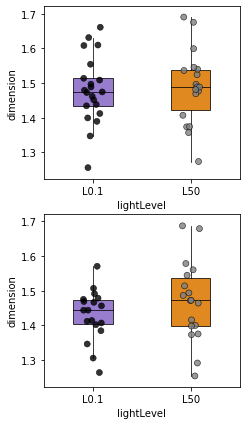

In [10]:
w = 7/2
# w = 8
h = w * 2

f, ax = plt.subplots(2,1, figsize = (w,h), sharey = True)

i=0

for v, sub in final_dim.groupby('visit'):
    sns.boxplot(ax = ax[i], x='lightLevel', y='dimension', data = sub, 
                fliersize = 0, **boxplot_kwargs)
    sns.stripplot(ax = ax[i], x='lightLevel', y='dimension', data = sub,
                 dodge=True, **stripplot_kwargs)
    i+=1
plt.savefig('./dataFolders/Output/KinematicAnalysis_Final/Figures/' + 'BoxDimension_wholeTrack_boxplot.pdf')

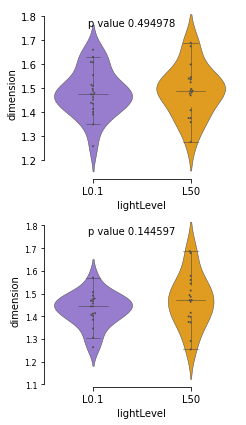

In [34]:
## make the plot
import seaborn as sns

f, ax = plt.subplots(2,1, figsize=(3.5, 3.5*2))
ax = ax.ravel()
i = 0
for visit, bla in final_dim.groupby('visit'):
    
    sns.violinplot(x="lightLevel", y="dimension", 
                   data = bla, 
                   inner = None,
                   linewidth = 0.5,
                   palette = ['mediumpurple','orange'],
                  ax = ax[i])

    sns.boxplot(x="lightLevel", y="dimension", 
                data = bla,
                linewidth = 0.5,
                fliersize = 0,
                width = 0.3,
               ax = ax[i])

    sns.swarmplot(x='lightLevel', y='dimension', 
                  data = bla,
                    size=2, 
                      color="0.3",
                      linewidth=0,
                 ax= ax[i])
    # print the p value into the plot
    ax[i].text(0.45, 0.90, 'p value %5f' %p[i], horizontalalignment='center',
        verticalalignment='center', transform=ax[i].transAxes)
#     ax[i].set_ylabel()
#     ax[i].set_xlabel()
    
    i+=1

# ax[1].text(0.45, 0.01, "Light level", size = 8, 
#           horizontalalignment='center',
#         verticalalignment='center', transform=ax[1].transAxes)
# ax[1].text(0.01, 1.5, "Box Dimension", size = 8, 
#           horizontalalignment='center',
#         verticalalignment='center',
#            rotation = 90,
#            transform=ax[1].transAxes)

# ax[0].set_xticklabels([], size = 8)
# ax[1].set_xticklabels(["Low","High"], size = 8)

sns.despine(trim=True)

for tick in ax[1].get_yticklabels():
    tick.set_fontsize(8) 
# ax.xaxis.grid(False)

# plt.savefig(mystr + 'BoxDimension_chunk' + str(lengthOfEachChunk) + ".pdf")
plt.savefig('./dataFolders/Output/KinematicAnalysis_Final/Figures/' + 'BoxDimension_wholeTrack.pdf')